# Importing Modules

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.datasets import load_iris

# Iris Dataset for target prediction

In [98]:
iris = load_iris()
df= pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
0                5.1               3.5                1.4               0.2       0
1                4.9               3.0                1.4               0.2       0
2                4.7               3.2                1.3               0.2       0
3                4.6               3.1                1.5               0.2       0
4                5.0               3.6                1.4               0.2       0


# Visualize Value Count

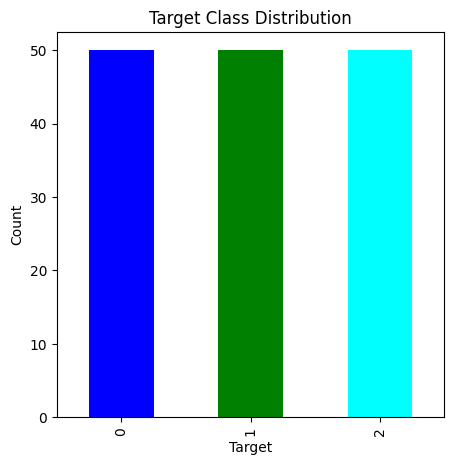

In [99]:
target_counts = df['target'].value_counts()
plt.figure(figsize=(5,5))
target_counts.plot(kind='bar',color=['blue','green','cyan'])
plt.title('Target Class Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [100]:
X = df.drop(columns='target')
X_train,X_test,y_train,y_test = train_test_split(X,df['target'],test_size=0.2,random_state=42)

# Evaluation on Gaussian NB

Accuracy 1.0


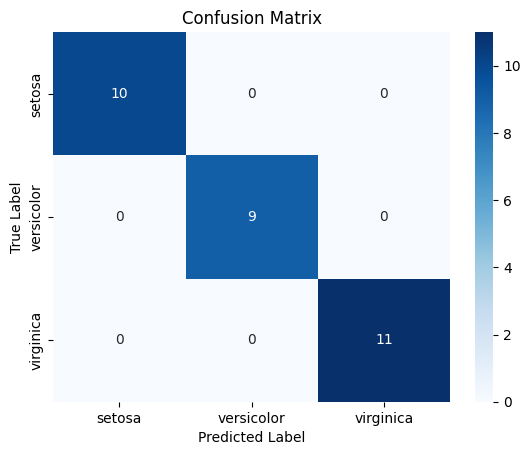

In [101]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
import seaborn as sns
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy",accuracy_score(y_pred,y_test))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# User Data for predicting Purchase Target

In [102]:
df = pd.read_csv("user_data.csv")

In [103]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [104]:
from operator import le
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
scaler = StandardScaler()
df['Gender'] = le.fit_transform(df['Gender'])
X = df.drop(columns=['Purchased'])
y = df['Purchased']
X = scaler.fit_transform(X)
print(X)

[[-0.93657932  1.02020406 -1.78179743 -1.49004624]
 [ 1.66838653  1.02020406 -0.25358736 -1.46068138]
 [-0.32087714 -0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.52039175 -0.98019606  1.17910958 -1.46068138]
 [ 0.88695546  1.02020406 -0.15807423 -1.07893824]
 [-1.36231017 -0.98019606  1.08359645 -0.99084367]]


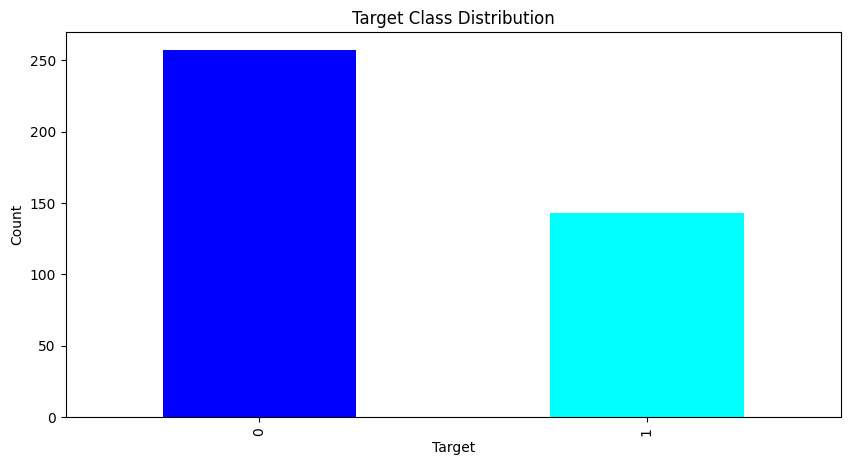

In [105]:
target_counts = y.value_counts()
plt.figure(figsize=(10,5))
target_counts.plot(kind='bar',color=['blue','cyan'])
plt.title('Target Class Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Bernoulli NB

0.7875


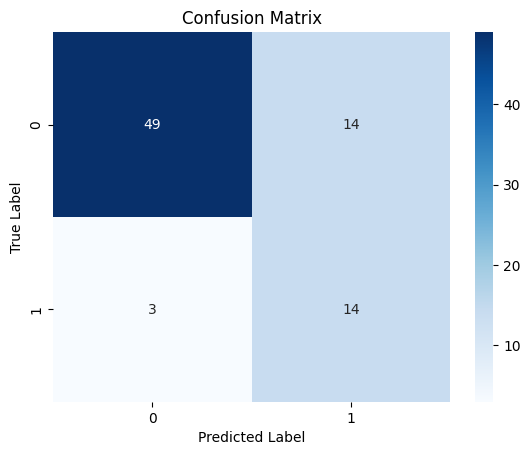

In [107]:
model = BernoulliNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred,y_test))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Gaussian NB

Accuracy :  0.9125


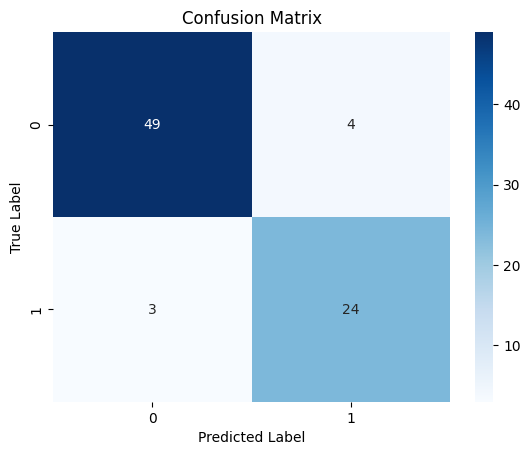

In [108]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy : ",accuracy_score(y_pred,y_test))
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()